# Introduction to using ParticleSpy

This is an example notebook for performing particle analysis using ParticleSpy.

This notebook takes a HAADF image of nanoparticles, allows the user to determine the best segmentation method and then performs analysis, producing a plot of particle areas.

Below, we load an image using Hyperspy.

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


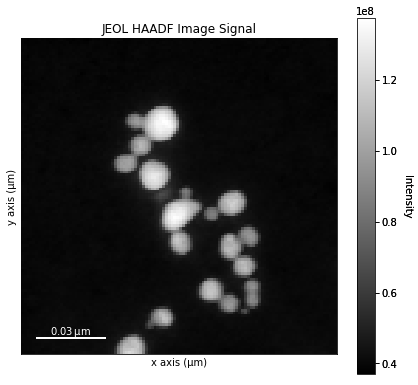

In [1]:
import hyperspy.api as hs
import ParticleSpy.api as ps

filename = "Data/JEOL HAADF Image.dm4"
haadf = hs.load(filename)

%matplotlib inline
haadf.plot()

Next, we can examine the image and determine the optimum segmentation procedure using the segmentation GUI. Experiment with changing the threshold algorithm and the application of watershedding to obtain the optimum labels. Once happy, click "Get Params" to print the current parameters.

In [2]:
ps.SegUI(haadf)

Next, we use the parameters saved when last pressing Update in the GUI to construct a parameter dictionary and use this to perform the segmentation.

In [3]:
params = ps.parameters()
params.load()
particles = ps.ParticleAnalysis(haadf,params)

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:348: RuntimeWarning: divide by zero encountered in reciprocal
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) *
C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:349: RuntimeWarning: invalid value encountered in multiply
  (P1[:-1] * (1.0 - P1[:-1])) ** 2)


It is then possible to plot a histogram of particle area.

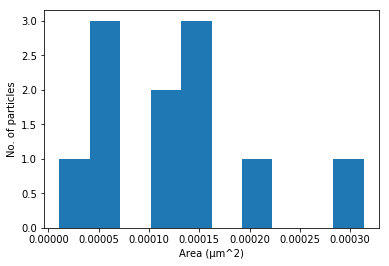

In [4]:
particles.plot_area()

## ParticleSpy with EDS data

If you have EDS data collected simultaneously with an image, it is possible to extract maps, spectra and the composition from each segmented particle. Firstly, load the EDS spectrum image.

In [5]:
eds_filename = "Data/EDS Spectrum Image.dm4"
eds = hs.load(eds_filename)

Next, put the HAADF image and EDS spectrum image together in a list to make one acquisition.

In [6]:
ac = [haadf,eds]

At this point, we need to set the parameters for the EDS analysis. This can be done by taking our previously used parameters object adding parameters with generate_eds().

In [7]:
params.generate_eds(elements=['Au','Cu'], store_maps=True, factors=[1.0,1.0], eds_method='CL')

Now, we need to run ParticleAnalysis again in order to get the accompanying EDS data.

In [8]:
import api as ps
particles2 = None
particles2 = ps.ParticleAnalysis(ac,params)

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:348: RuntimeWarning: divide by zero encountered in reciprocal
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) *
C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:349: RuntimeWarning: invalid value encountered in multiply
  (P1[:-1] * (1.0 - P1[:-1])) ** 2)
C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\hyperspy\misc\material.py:42: RuntimeWarning: invalid value encountered in true_divide
  atomic_percent[i] /= sum_weight


The extracted maps of each element can be accessed from the particle list from maps['element'].

ValueError: Function <bound method BaseSignal.update_plot of <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: Cu_Ka at 8.05 keV, dimensions: (17, 15|)>> already connected to <hyperspy.events.Event: Event that triggers when the data has changed: {<bound method BaseSignal.update_plot of <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: Cu_Ka at 8.05 keV, dimensions: (17, 15|)>>}>.

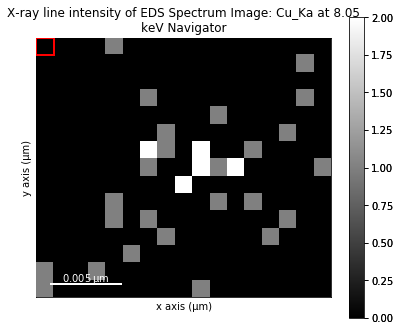

In [13]:
particles2.list[-1].maps['Cu'].plot()

The composition of each particle can be accessed from the particle list using list[particle].composition.

In [14]:
particles2.list[-1].composition

{'Au': array([0.]), 'Cu': array([100.])}